In [52]:
from __future__ import division
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
from numpy.polynomial import polynomial as P
%matplotlib inline

In [3]:
#Make lists containing V, D and J gene names.
TRAV=['TRAV1-1*00','TRAV1-2*00','TRAV2*00','TRAV3*00','TRAV4*00','TRAV5*00',
      'TRAV6*00','TRAV7*00','TRAV8-1*00','TRAV9-1*00','TRAV10*00','TRAV11*00',
      'TRAV12-1*00','TRAV8-2*00','TRAV8-3*00','TRAV13-1*00','TRAV12-2*00',
      'TRAV8-4*00','TRAV8-5*00','TRAV13-2*00','TRAV14DV4*00','TRAV9-2*00',
      'TRAV15*00','TRAV12-3*00','TRAV8-6*00','TRAV16*00','TRAV17*00','TRAV18*00',
      'TRAV19*00','TRAV20*00','TRAV21*00','TRAV22*00','TRAV23DV6*00','TRAV24*00',
      'TRAV25*00','TRAV26-1*00','TRAV8-7*00','TRAV27*00','TRAV28*00','TRAV29DV5*00',
      'TRAV30*00','TRAV31*00','TRAV32*00','TRAV33*00','TRAV26-2*00','TRAV34*00',
      'TRAV35*00','TRAV36DV7*00','TRAV37*00','TRAV38-1*00','TRAV38-2DV8*00',
      'TRAV39*00','TRAV40*00','TRAV41*00']

TRBV=['TRBV1*00','TRBV2*00','TRBV3-1*00','TRBV4-1*00','TRBV5-1*00','TRBV6-1*00',
      'TRBV7-1*00','TRBV4-2*00','TRBV6-2*00','TRBV3-2*00','TRBV4-3*00',
      'TRBV6-3*00','TRBV7-2*00','TRBV8-1*00','TRBV5-2*00','TRBV6-4*00',
      'TRBV7-3*00','TRBV8-2*00','TRBV5-3*00','TRBV9*00','TRBV10-1*00',
      'TRBV11-1*00','TRBV12-1*00','TRBV10-2*00','TRBV11-2*00','TRBV12-2*00',
      'TRBV6-5*00','TRBV7-4*00','TRBV5-4*00','TRBV6-6*00','TRBV7-5*00',
      'TRBV5-5*00','TRBV6-7*00','TRBV7-6*00','TRBV5-6*00','TRBV6-8*00',
      'TRBV7-7*00','TRBV5-7*00','TRBV6-9*00','TRBV7-8*00','TRBV5-8*00',
      'TRBV7-9*00','TRBV13*00','TRBV10-3*00','TRBV11-3*00','TRBV12-3*00',
      'TRBV12-4*00','TRBV12-5*00','TRBV14*00','TRBV15*00','TRBV16*00',
      'TRBV17*00','TRBV18*00','TRBV19*00','TRBV20-1*00','TRBV21-1*00',
      'TRBV22-1*00','TRBV23-1*00','TRBV24-1*00','TRBV25-1*00','TRBV26*00',
      'TRBV27*00','TRBV28*00','TRBV29-1*00','TRBV30*00']

TRBJ=['TRBJ1-1*00','TRBJ1-2*00','TRBJ1-3*00','TRBJ1-4*00','TRBJ1-5*00',
    'TRBJ1-6*00','TRBJ2-1*00','TRBJ2-2*00','TRBJ2-3*00','TRBJ2-4*00',
    'TRBJ2-5*00','TRBJ2-6*00','TRBJ2-7*00']

TRAJ=['TRAJ61*00','TRAJ60*00','TRAJ59*00','TRAJ58*00','TRAJ57*00','TRAJ56*00',
      'TRAJ55*00','TRAJ54*00','TRAJ53*00','TRAJ52*00','TRAJ51*00','TRAJ50*00',
      'TRAJ49*00','TRAJ48*00','TRAJ47*00','TRAJ46*00','TRAJ45*00','TRAJ44*00',
      'TRAJ43*00','TRAJ42*00','TRAJ41*00','TRAJ40*00','TRAJ39*00','TRAJ38*00',
      'TRAJ37*00','TRAJ36*00','TRAJ35*00','TRAJ34*00','TRAJ33*00','TRAJ32*00',
      'TRAJ31*00','TRAJ30*00','TRAJ29*00','TRAJ28*00','TRAJ27*00','TRAJ26*00',
      'TRAJ25*00','TRAJ24*00','TRAJ23*00','TRAJ22*00','TRAJ21*00','TRAJ20*00',
      'TRAJ19*00','TRAJ18*00','TRAJ17*00','TRAJ16*00','TRAJ15*00','TRAJ14*00',
      'TRAJ13*00','TRAJ12*00','TRAJ11*00','TRAJ10*00','TRAJ9*00','TRAJ8*00',
      'TRAJ7*00','TRAJ6*00','TRAJ5*00','TRAJ4*00','TRAJ3*00','TRAJ2*00','TRAJ1*00']

TRBD = ['TRBD1*00','TRBD2*00']

In [18]:
#Define a function to calculate mutual information with applied correction
def mutual_information(df, entity1, entity2, entity1_list, entity2_list, bootstrap=10):
    """This function calculates mutual information between two genes of interest
    for each random fraction of a sample.
    Input:
    df - dataframe of interest,
    gene_alpha - alpha gene of interest (BestVhitA, BestJhitA),
    gene_beta - beta gene of interest (BestVhitB, BestJhitB),
    gene_alpha_list - alpha gene list of interest (TRAV, TRAJ),
    gene_beta_list - beta gene list of interest (TRBV, TRBJ),
    bootstrap=10 (default) - number of times for bootstrapping.
    Returns:
    X - numpy array of 1/sample size for each fraction,
    Y - numpy array of mean mutual information for each sample fraction,
    E - numpy array of standard error of the mean mutual information."""
    #make a fraction array from 1 to 0.05, with 0.05 increments.
    fraction=np.arange(1.0,0.05,-0.05)
    #calculate 1/sample size for wanted dataframe for each fraction.
    X=[1/(len(df)*i) for i in fraction]
    #Initiate arrays for mutual information mean and standard error of the mean.
    Y=([])
    E=([])
    #start looping over each fraction.
    for k in fraction:
        #initiate an array of mutual information for each bootstrapping step.
        bootstrapped = ([])
        #start looping for bootstrapping.
        for j in range(0,bootstrap):
            #randomly subsample the dataframe.
            frac_sample=df.sample(frac=k)
            #make a table of each alpha gene as index and each beta gene as column.
            count_table=pd.DataFrame(index=entity1_list, columns=entity2_list)
            #start looping over count table.
            for i in range(len(count_table)):
                #extract all rows with the alpha gene and make dataframe of value counts
                #for each beta gene as number of time it appears with that alpha gene.
                a=frac_sample[frac_sample[entity1]==count_table.index[i]][entity2].value_counts()
                #if there are genes in the a dataframe:
                if len(a)>0:
                    #update the table for each value count.
                    for l in range(len(a)):
                        count_table[a.index[l]].iloc[i]=a.iloc[l]
            #fill in all empty cells of the table with 0.
            count_table=count_table.fillna(value=0)
            #make a table of frequencies out of the count table.
            freq_table=count_table.divide(count_table.sum().sum())
            #calculate marginal probabilities of alpha genes
            ent1=np.array(freq_table.sum(axis=1))
            #calculate marginal probabilities of beta genes
            ent2=np.array(freq_table.sum(axis=0))
            #flatten freq table so that it's not a nested array.
            freq_table=np.array(freq_table).flatten()
            #calculate mutual information.
            for i in range(len(ent1)):
                if ent1[i]>0:
                    ent1[i]=-ent1[i]*math.log(ent1[i],2)
            for i in range(len(ent2)):
                if ent2[i]>0:
                    ent2[i]=-ent2[i]*math.log(ent2[i],2)
            for i in range(len(freq_table)):
                if freq_table[i]>0:
                    freq_table[i]=-freq_table[i]*math.log(freq_table[i],2)
            MI=np.sum(ent1)+np.sum(ent2)-np.sum(freq_table)
            #append the bootstrap array
            bootstrapped=np.append(bootstrapped,MI)
        #append mutual information array with mean mutual information
        Y=np.append(Y, np.mean(bootstrapped))
        #append error array with standard deviation of the mean.
        E=np.append(E, np.std(bootstrapped))
        E=np.divide(E, bootstrap**0.5)
    return [X,Y,E]

In [6]:
cd /Users/kgrigait/Desktop/new_data

/Users/kgrigait/Desktop/new_data


In [7]:
#Import data
TRp_prod_1=pd.read_csv('S1/TRpairs_productive.txt', sep='\t')
TRp_prod_2=pd.read_csv('S2/TRpairs_productive.txt', sep='\t')
TRp_prod_3=pd.read_csv('S3/TRpairs_productive.txt', sep='\t')
TRp_prod_4=pd.read_csv('S4/TRpairs_productive.txt', sep='\t')
TRp_prod_5=pd.read_csv('S5/TRpairs_productive.txt', sep='\t')

TRA_prod_1=pd.read_csv('S1/TRAsFinal_productive.txt', sep='\t')
TRA_prod_2=pd.read_csv('S2/TRAsFinal_productive.txt', sep='\t')
TRA_prod_3=pd.read_csv('S3/TRAsFinal_productive.txt', sep='\t')
TRA_prod_4=pd.read_csv('S4/TRAsFinal_productive.txt', sep='\t')
TRA_prod_5=pd.read_csv('S5/TRAsFinal_productive.txt', sep='\t')

TRB_prod_1=pd.read_csv('S1/TRBsFinal_productive.txt', sep='\t')
TRB_prod_2=pd.read_csv('S2/TRBsFinal_productive.txt', sep='\t')
TRB_prod_3=pd.read_csv('S3/TRBsFinal_productive.txt', sep='\t')
TRB_prod_4=pd.read_csv('S4/TRBsFinal_productive.txt', sep='\t')
TRB_prod_5=pd.read_csv('S5/TRBsFinal_productive.txt', sep='\t')

In [36]:
#Make table to fill in with true mutual information values.
MI_table=pd.DataFrame(index=['aCDR3-bCDR3','aV-bV','aV-bJ','aJ-bV','aJ-bJ','aV-bD',
                    'aJ-bD','aV-aJ','bV-bJ','bV-bD','bD-bJ'],columns=['S1','S2','S3','S4','S5'])

In [25]:
#Get mutual information values using the function.
#Between genes across the alpha beta chains
aVbV_1 = mutual_information(TRp_prod_1, 'BestVhitA', 'BestVhitB', TRAV, TRBV)
aVbV_2 = mutual_information(TRp_prod_2, 'BestVhitA', 'BestVhitB', TRAV, TRBV)
aVbV_3 = mutual_information(TRp_prod_3, 'BestVhitA', 'BestVhitB', TRAV, TRBV)
aVbV_4 = mutual_information(TRp_prod_4, 'BestVhitA', 'BestVhitB', TRAV, TRBV)
aVbV_5 = mutual_information(TRp_prod_5, 'BestVhitA', 'BestVhitB', TRAV, TRBV)

aVbJ_1 = mutual_information(TRp_prod_1, 'BestVhitA', 'BestJhitB', TRAV, TRBJ)
aVbJ_2 = mutual_information(TRp_prod_2, 'BestVhitA', 'BestJhitB', TRAV, TRBJ)
aVbJ_3 = mutual_information(TRp_prod_3, 'BestVhitA', 'BestJhitB', TRAV, TRBJ)
aVbJ_4 = mutual_information(TRp_prod_4, 'BestVhitA', 'BestJhitB', TRAV, TRBJ)
aVbJ_5 = mutual_information(TRp_prod_5, 'BestVhitA', 'BestJhitB', TRAV, TRBJ)

aJbV_1 = mutual_information(TRp_prod_1, 'BestJhitA', 'BestVhitB', TRAJ, TRBV)
aJbV_2 = mutual_information(TRp_prod_2, 'BestJhitA', 'BestVhitB', TRAJ, TRBV)
aJbV_3 = mutual_information(TRp_prod_3, 'BestJhitA', 'BestVhitB', TRAJ, TRBV)
aJbV_4 = mutual_information(TRp_prod_4, 'BestJhitA', 'BestVhitB', TRAJ, TRBV)
aJbV_5 = mutual_information(TRp_prod_5, 'BestJhitA', 'BestVhitB', TRAJ, TRBV)

aJbJ_1 = mutual_information(TRp_prod_1, 'BestJhitA', 'BestJhitB', TRAJ, TRBJ)
aJbJ_2 = mutual_information(TRp_prod_2, 'BestJhitA', 'BestJhitB', TRAJ, TRBJ)
aJbJ_3 = mutual_information(TRp_prod_3, 'BestJhitA', 'BestJhitB', TRAJ, TRBJ)
aJbJ_4 = mutual_information(TRp_prod_4, 'BestJhitA', 'BestJhitB', TRAJ, TRBJ)
aJbJ_5 = mutual_information(TRp_prod_5, 'BestJhitA', 'BestJhitB', TRAJ, TRBJ)

aVbD_1 = mutual_information(TRp_prod_1, 'BestVhitA', 'BestDhitB', TRAV, TRBD)
aVbD_2 = mutual_information(TRp_prod_2, 'BestVhitA', 'BestDhitB', TRAV, TRBD)
aVbD_3 = mutual_information(TRp_prod_3, 'BestVhitA', 'BestDhitB', TRAV, TRBD)
aVbD_4 = mutual_information(TRp_prod_4, 'BestVhitA', 'BestDhitB', TRAV, TRBD)
aVbD_5 = mutual_information(TRp_prod_5, 'BestVhitA', 'BestDhitB', TRAV, TRBD)

aJbD_1 = mutual_information(TRp_prod_1, 'BestJhitA', 'BestDhitB', TRAJ, TRBD)
aJbD_2 = mutual_information(TRp_prod_2, 'BestJhitA', 'BestDhitB', TRAJ, TRBD)
aJbD_3 = mutual_information(TRp_prod_3, 'BestJhitA', 'BestDhitB', TRAJ, TRBD)
aJbD_4 = mutual_information(TRp_prod_4, 'BestJhitA', 'BestDhitB', TRAJ, TRBD)
aJbD_5 = mutual_information(TRp_prod_5, 'BestJhitA', 'BestDhitB', TRAJ, TRBD)

In [26]:
#Between gene within the alpha and beta chains.
aVaJ_1 = mutual_information(TRA_prod_1, 'bestVHit','bestJHit', TRAV, TRAJ)
aVaJ_2 = mutual_information(TRA_prod_2, 'bestVHit','bestJHit', TRAV, TRAJ)
aVaJ_3 = mutual_information(TRA_prod_3, 'bestVHit','bestJHit', TRAV, TRAJ)
aVaJ_4 = mutual_information(TRA_prod_4, 'bestVHit','bestJHit', TRAV, TRAJ)
aVaJ_5 = mutual_information(TRA_prod_5, 'bestVHit','bestJHit', TRAV, TRAJ)

bVbJ_1 = mutual_information(TRB_prod_1, 'bestVHit','bestJHit', TRBV, TRBJ)
bVbJ_2 = mutual_information(TRB_prod_2, 'bestVHit','bestJHit', TRBV, TRBJ)
bVbJ_3 = mutual_information(TRB_prod_3, 'bestVHit','bestJHit', TRBV, TRBJ)
bVbJ_4 = mutual_information(TRB_prod_4, 'bestVHit','bestJHit', TRBV, TRBJ)
bVbJ_5 = mutual_information(TRB_prod_5, 'bestVHit','bestJHit', TRBV, TRBJ)

bVbD_1 = mutual_information(TRB_prod_1, 'bestVHit','bestDHit', TRBV, TRBD)
bVbD_2 = mutual_information(TRB_prod_2, 'bestVHit','bestDHit', TRBV, TRBD)
bVbD_3 = mutual_information(TRB_prod_3, 'bestVHit','bestDHit', TRBV, TRBD)
bVbD_4 = mutual_information(TRB_prod_4, 'bestVHit','bestDHit', TRBV, TRBD)
bVbD_5 = mutual_information(TRB_prod_5, 'bestVHit','bestDHit', TRBV, TRBD)

bDbJ_1 = mutual_information(TRB_prod_1, 'bestDHit','bestJHit', TRBD, TRBJ)
bDbJ_2 = mutual_information(TRB_prod_2, 'bestDHit','bestJHit', TRBD, TRBJ)
bDbJ_3 = mutual_information(TRB_prod_3, 'bestDHit','bestJHit', TRBD, TRBJ)
bDbJ_4 = mutual_information(TRB_prod_4, 'bestDHit','bestJHit', TRBD, TRBJ)
bDbJ_5 = mutual_information(TRB_prod_5, 'bestDHit','bestJHit', TRBD, TRBJ)

In [27]:
#Between alpha and beta CDR3 lenghts.
#First need to make entity lists, which is this case is a list of unique CDR3 lengths.
A_lengths_list1=sorted(TRp_prod_1.LengthCDR3A.unique().tolist())
B_lengths_list1=sorted(TRp_prod_1.LengthCDR3B.unique().tolist())

A_lengths_list2=sorted(TRp_prod_2.LengthCDR3A.unique().tolist())
B_lengths_list2=sorted(TRp_prod_2.LengthCDR3B.unique().tolist())

A_lengths_list3=sorted(TRp_prod_3.LengthCDR3A.unique().tolist())
B_lengths_list3=sorted(TRp_prod_3.LengthCDR3B.unique().tolist())

A_lengths_list4=sorted(TRp_prod_4.LengthCDR3A.unique().tolist())
B_lengths_list4=sorted(TRp_prod_4.LengthCDR3B.unique().tolist())

A_lengths_list5=sorted(TRp_prod_5.LengthCDR3A.unique().tolist())
B_lengths_list5=sorted(TRp_prod_5.LengthCDR3B.unique().tolist())

aCDR3_bCDR3_1=mutual_information(TRp_prod_1, 'LengthCDR3A','LengthCDR3B', A_lengths_list1, B_lengths_list1)
aCDR3_bCDR3_2=mutual_information(TRp_prod_2, 'LengthCDR3A','LengthCDR3B', A_lengths_list2, B_lengths_list2)
aCDR3_bCDR3_3=mutual_information(TRp_prod_3, 'LengthCDR3A','LengthCDR3B', A_lengths_list3, B_lengths_list3)
aCDR3_bCDR3_4=mutual_information(TRp_prod_4, 'LengthCDR3A','LengthCDR3B', A_lengths_list4, B_lengths_list4)
aCDR3_bCDR3_5=mutual_information(TRp_prod_5, 'LengthCDR3A','LengthCDR3B', A_lengths_list5, B_lengths_list2)

In [48]:
#define a function to fit the mutual information curve and fill the MI table.
def mi_fit(mi,pair,subject):
    """
    This function fits the mutual information correction curve and updates the
    mutual information table (MI_table) with true mutual information value.
    Inputs:
    mi - estimated mutual information values for each fraction acquired from mutual_information function.
    pair (string) - a pair of interest: ['aCDR3-bCDR3','aV-bV','aV-bJ','aJ-bV','aJ-bJ','aV-bD',
            'aJ-bD','aV-aJ','bV-bJ','bV-bD','bD-bJ']
    subject (string) - subject of interest: ['S1','S2','S3','S4','S5']
    Output: np array of fitted curve X and Y values for plotting. The MI_table gets updated.
    """
    X_fit = np.linspace(0,mi[0][-1],50)
    c = P.polyfit(mi[0],mi[1],2)
    MI_fit = c[0]+c[1]*X_fit+c[2]*X_fit**2
    MI_table.ix[pair,subject]=c[0]
    return [X_fit,MI_fit]

In [49]:
#acquire fitted MI curve values and update the table using the mi_fit function.
MI_aVbV_1 = mi_fit(aVbV_1, 'aV-bV', 'S1')
MI_aVbV_2 = mi_fit(aVbV_2, 'aV-bV', 'S2')
MI_aVbV_3 = mi_fit(aVbV_3, 'aV-bV', 'S3')
MI_aVbV_4 = mi_fit(aVbV_4, 'aV-bV', 'S4')
MI_aVbV_5 = mi_fit(aVbV_5, 'aV-bV', 'S5')

MI_aVbJ_1 = mi_fit(aVbJ_1, 'aV-bJ', 'S1')
MI_aVbJ_2 = mi_fit(aVbJ_2, 'aV-bJ', 'S2')
MI_aVbJ_3 = mi_fit(aVbJ_3, 'aV-bJ', 'S3')
MI_aVbJ_4 = mi_fit(aVbJ_4, 'aV-bJ', 'S4')
MI_aVbJ_5 = mi_fit(aVbJ_5, 'aV-bJ', 'S5')

MI_aJbV_1 = mi_fit(aJbV_1, 'aJ-bV', 'S1')
MI_aJbV_2 = mi_fit(aJbV_2, 'aJ-bV', 'S2')
MI_aJbV_3 = mi_fit(aJbV_3, 'aJ-bV', 'S3')
MI_aJbV_4 = mi_fit(aJbV_4, 'aJ-bV', 'S4')
MI_aJbV_5 = mi_fit(aJbV_5, 'aJ-bV', 'S5')

MI_aJbJ_1 = mi_fit(aJbJ_1, 'aJ-bJ', 'S1')
MI_aJbJ_2 = mi_fit(aJbJ_2, 'aJ-bJ', 'S2')
MI_aJbJ_3 = mi_fit(aJbJ_3, 'aJ-bJ', 'S3')
MI_aJbJ_4 = mi_fit(aJbJ_4, 'aJ-bJ', 'S4')
MI_aJbJ_5 = mi_fit(aJbJ_5, 'aJ-bJ', 'S5')

MI_aVbD_1 = mi_fit(aVbD_1, 'aV-bD', 'S1')
MI_aVbD_2 = mi_fit(aVbD_2, 'aV-bD', 'S2')
MI_aVbD_3 = mi_fit(aVbD_3, 'aV-bD', 'S3')
MI_aVbD_4 = mi_fit(aVbD_4, 'aV-bD', 'S4')
MI_aVbD_5 = mi_fit(aVbD_5, 'aV-bD', 'S5')

MI_aJbD_1 = mi_fit(aJbD_1, 'aJ-bD', 'S1')
MI_aJbD_2 = mi_fit(aJbD_2, 'aJ-bD', 'S2')
MI_aJbD_3 = mi_fit(aJbD_3, 'aJ-bD', 'S3')
MI_aJbD_4 = mi_fit(aJbD_4, 'aJ-bD', 'S4')
MI_aJbD_5 = mi_fit(aJbD_5, 'aJ-bD', 'S5')

MI_aVaJ_1 = mi_fit(aVaJ_1, 'aV-aJ', 'S1')
MI_aVaJ_2 = mi_fit(aVaJ_2, 'aV-aJ', 'S2')
MI_aVaJ_3 = mi_fit(aVaJ_3, 'aV-aJ', 'S3')
MI_aVaJ_4 = mi_fit(aVaJ_4, 'aV-aJ', 'S4')
MI_aVaJ_5 = mi_fit(aVaJ_5, 'aV-aJ', 'S5')    

MI_bVbJ_1 = mi_fit(bVbJ_1, 'bV-bJ', 'S1')
MI_bVbJ_2 = mi_fit(bVbJ_2, 'bV-bJ', 'S2')
MI_bVbJ_3 = mi_fit(bVbJ_3, 'bV-bJ', 'S3')
MI_bVbJ_4 = mi_fit(bVbJ_4, 'bV-bJ', 'S4')
MI_bVbJ_5 = mi_fit(bVbJ_5, 'bV-bJ', 'S5')

MI_bVbD_1 = mi_fit(bVbD_1, 'bV-bD', 'S1')
MI_bVbD_2 = mi_fit(bVbD_2, 'bV-bD', 'S2')
MI_bVbD_3 = mi_fit(bVbD_3, 'bV-bD', 'S3')
MI_bVbD_4 = mi_fit(bVbD_4, 'bV-bD', 'S4')
MI_bVbD_5 = mi_fit(bVbD_5, 'bV-bD', 'S5')

MI_bDbJ_1 = mi_fit(bDbJ_1, 'bD-bJ', 'S1')
MI_bDbJ_2 = mi_fit(bDbJ_2, 'bD-bJ', 'S2')
MI_bDbJ_3 = mi_fit(bDbJ_3, 'bD-bJ', 'S3')
MI_bDbJ_4 = mi_fit(bDbJ_4, 'bD-bJ', 'S4')
MI_bDbJ_5 = mi_fit(bDbJ_5, 'bD-bJ', 'S5')

MI_aCDR3_bCDR3_1 = mi_fit(aCDR3_bCDR3_1, 'aCDR3-bCDR3', 'S1')
MI_aCDR3_bCDR3_2 = mi_fit(aCDR3_bCDR3_2, 'aCDR3-bCDR3', 'S2')
MI_aCDR3_bCDR3_3 = mi_fit(aCDR3_bCDR3_3, 'aCDR3-bCDR3', 'S3')
MI_aCDR3_bCDR3_4 = mi_fit(aCDR3_bCDR3_4, 'aCDR3-bCDR3', 'S4')
MI_aCDR3_bCDR3_5 = mi_fit(aCDR3_bCDR3_5, 'aCDR3-bCDR3', 'S5')

In [50]:
#Save the MI table into a text file.
MI_table.to_csv('Mutual_information_table.txt', sep='\t')

In [67]:
MI_table

,S1,S2,S3,S4,S5
aCDR3-bCDR3,0.00235758,0.00899278,0.00326052,0.0543341,0.0103359
aV-bV,0.0153723,0.0714112,0.0137396,0.243876,0.118096
aV-bJ,0.00290949,0.0308282,0.00652404,0.134189,0.0282359
aJ-bV,0.0103821,0.0811047,0.0190718,0.239782,0.113555
aJ-bJ,0.00212323,0.0387765,0.00388362,0.139297,0.0309762
aV-bD,0.000551729,0.00654744,0.000996294,0.00607523,0.00528562
aJ-bD,0.000570504,0.0110593,0.000773746,0.00956568,0.0055725
aV-aJ,0.278309,0.502803,0.288047,0.84692,0.315273
bV-bJ,0.0478053,0.164808,0.0551123,0.474322,0.0652448
bV-bD,0.00497598,0.0653593,0.00793545,0.0348744,0.0142333


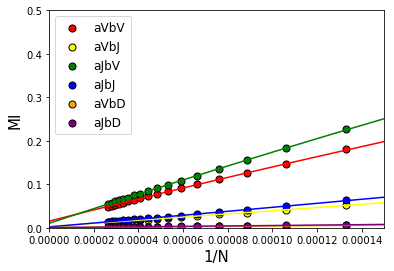

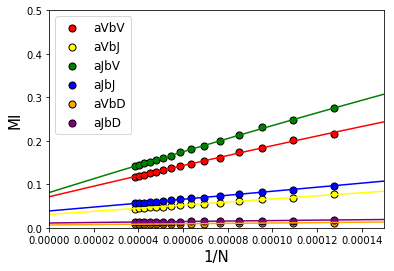

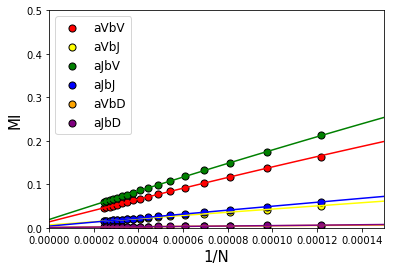

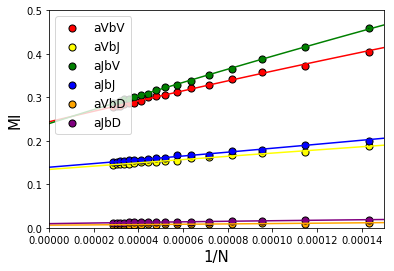

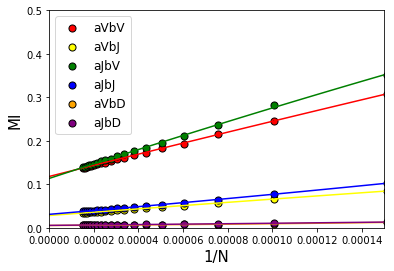

In [59]:
# Make plots of mutual information values and fitted curves.
# The plots are not included in the manuscript. These are to show how well the curve fits if interested.

#Subject 1.
f, ax = plt.subplots()
ax.scatter(aVbV_1[0],aVbV_1[1],color='red', edgecolor='black', marker='o', s=50, label='aVbV', alpha=1)
ax.scatter(aVbJ_1[0],aVbJ_1[1],color='yellow', edgecolor='black', marker='o', s=50, label='aVbJ', alpha=1)
ax.scatter(aJbV_1[0],aJbV_1[1],color='green', edgecolor='black', marker='o', s=50, label='aJbV', alpha=1)
ax.scatter(aJbJ_1[0],aJbJ_1[1],color='blue', edgecolor='black', marker='o', s=50, label='aJbJ', alpha=1)
ax.scatter(aVbD_1[0],aVbD_1[1],color='orange', edgecolor='black', marker='o', s=50, label='aVbD', alpha=1)
ax.scatter(aJbD_1[0],aJbD_1[1],color='purple', edgecolor='black', marker='o', s=50, label='aJbD', alpha=1)

ax.plot(MI_aVbV_1[0],MI_aVbV_1[1],color='red', alpha=1)
ax.plot(MI_aVbJ_1[0],MI_aVbJ_1[1],color='yellow', alpha=1)
ax.plot(MI_aJbV_1[0],MI_aJbV_1[1],color='green', alpha=1)
ax.plot(MI_aJbJ_1[0],MI_aJbJ_1[1],color='blue', alpha=1)
ax.plot(MI_aVbD_1[0],MI_aVbD_1[1],color='orange', alpha=1)
ax.plot(MI_aJbD_1[0],MI_aJbD_1[1],color='purple', alpha=1)

ax.errorbar(aVbV_1[0], aVbV_1[1], yerr=aVbV_1[2], ls='none', color='black', elinewidth=2)
ax.errorbar(aVbJ_1[0], aVbJ_1[1], yerr=aVbJ_1[2], ls='none', color='black', elinewidth=2)
ax.errorbar(aJbV_1[0], aJbV_1[1], yerr=aJbV_1[2], ls='none', color='black', elinewidth=2)
ax.errorbar(aJbJ_1[0], aJbJ_1[1], yerr=aJbJ_1[2], ls='none', color='black', elinewidth=2)
ax.errorbar(aVbD_1[0], aVbD_1[1], yerr=aVbD_1[2], ls='none', color='black', elinewidth=2)
ax.errorbar(aJbD_1[0], aJbD_1[1], yerr=aJbD_1[2], ls='none', color='black', elinewidth=2)

ax.set_xlabel("1/N", fontsize=15)
ax.set_ylabel("MI", fontsize=15)
plt.xlim(0, 0.00015)
plt.ylim(0, 0.5)
plt.legend(loc='upper left', fontsize=12)
plt.savefig('Mutual_information_pairedgenes_S1.png')

#Subject 2.
f, ax = plt.subplots()
ax.scatter(aVbV_2[0],aVbV_2[1],color='red', edgecolor='black', marker='o', s=50, label='aVbV', alpha=1)
ax.scatter(aVbJ_2[0],aVbJ_2[1],color='yellow', edgecolor='black', marker='o', s=50, label='aVbJ', alpha=1)
ax.scatter(aJbV_2[0],aJbV_2[1],color='green', edgecolor='black', marker='o', s=50, label='aJbV', alpha=1)
ax.scatter(aJbJ_2[0],aJbJ_2[1],color='blue', edgecolor='black', marker='o', s=50, label='aJbJ', alpha=1)
ax.scatter(aVbD_2[0],aVbD_2[1],color='orange', edgecolor='black', marker='o', s=50, label='aVbD', alpha=1)
ax.scatter(aJbD_2[0],aJbD_2[1],color='purple', edgecolor='black', marker='o', s=50, label='aJbD', alpha=1)

ax.plot(MI_aVbV_2[0],MI_aVbV_2[1],color='red', alpha=1)
ax.plot(MI_aVbJ_2[0],MI_aVbJ_2[1],color='yellow', alpha=1)
ax.plot(MI_aJbV_2[0],MI_aJbV_2[1],color='green', alpha=1)
ax.plot(MI_aJbJ_2[0],MI_aJbJ_2[1],color='blue', alpha=1)
ax.plot(MI_aVbD_2[0],MI_aVbD_2[1],color='orange', alpha=1)
ax.plot(MI_aJbD_2[0],MI_aJbD_2[1],color='purple', alpha=1)

ax.errorbar(aVbV_2[0], aVbV_2[1], yerr=aVbV_2[2], ls='none', color='black', elinewidth=2)
ax.errorbar(aVbJ_2[0], aVbJ_2[1], yerr=aVbJ_2[2], ls='none', color='black', elinewidth=2)
ax.errorbar(aJbV_2[0], aJbV_2[1], yerr=aJbV_2[2], ls='none', color='black', elinewidth=2)
ax.errorbar(aJbJ_2[0], aJbJ_2[1], yerr=aJbJ_2[2], ls='none', color='black', elinewidth=2)
ax.errorbar(aVbD_2[0], aVbD_2[1], yerr=aVbD_2[2], ls='none', color='black', elinewidth=2)
ax.errorbar(aJbD_2[0], aJbD_2[1], yerr=aJbD_2[2], ls='none', color='black', elinewidth=2)

ax.set_xlabel("1/N", fontsize=15)
ax.set_ylabel("MI", fontsize=15)
plt.xlim(0, 0.00015)
plt.ylim(0, 0.5)
plt.legend(loc='upper left', fontsize=12)
plt.savefig('Mutual_information_pairedgenes_S2.png')

#Subject 3.
f, ax = plt.subplots()
ax.scatter(aVbV_3[0],aVbV_3[1],color='red', edgecolor='black', marker='o', s=50, label='aVbV', alpha=1)
ax.scatter(aVbJ_3[0],aVbJ_3[1],color='yellow', edgecolor='black', marker='o', s=50, label='aVbJ', alpha=1)
ax.scatter(aJbV_3[0],aJbV_3[1],color='green', edgecolor='black', marker='o', s=50, label='aJbV', alpha=1)
ax.scatter(aJbJ_3[0],aJbJ_3[1],color='blue', edgecolor='black', marker='o', s=50, label='aJbJ', alpha=1)
ax.scatter(aVbD_3[0],aVbD_3[1],color='orange', edgecolor='black', marker='o', s=50, label='aVbD', alpha=1)
ax.scatter(aJbD_3[0],aJbD_3[1],color='purple', edgecolor='black', marker='o', s=50, label='aJbD', alpha=1)

ax.plot(MI_aVbV_3[0],MI_aVbV_3[1],color='red', alpha=1)
ax.plot(MI_aVbJ_3[0],MI_aVbJ_3[1],color='yellow', alpha=1)
ax.plot(MI_aJbV_3[0],MI_aJbV_3[1],color='green', alpha=1)
ax.plot(MI_aJbJ_3[0],MI_aJbJ_3[1],color='blue', alpha=1)
ax.plot(MI_aVbD_3[0],MI_aVbD_3[1],color='orange', alpha=1)
ax.plot(MI_aJbD_3[0],MI_aJbD_3[1],color='purple', alpha=1)

ax.errorbar(aVbV_3[0], aVbV_3[1], yerr=aVbV_3[2], ls='none', color='black', elinewidth=2)
ax.errorbar(aVbJ_3[0], aVbJ_3[1], yerr=aVbJ_3[2], ls='none', color='black', elinewidth=2)
ax.errorbar(aJbV_3[0], aJbV_3[1], yerr=aJbV_3[2], ls='none', color='black', elinewidth=2)
ax.errorbar(aJbJ_3[0], aJbJ_3[1], yerr=aJbJ_3[2], ls='none', color='black', elinewidth=2)
ax.errorbar(aVbD_3[0], aVbD_3[1], yerr=aVbD_3[2], ls='none', color='black', elinewidth=2)
ax.errorbar(aJbD_3[0], aJbD_3[1], yerr=aJbD_3[2], ls='none', color='black', elinewidth=2)

ax.set_xlabel("1/N", fontsize=15)
ax.set_ylabel("MI", fontsize=15)
plt.xlim(0, 0.00015)
plt.ylim(0, 0.5)
plt.legend(loc='upper left', fontsize=12)
plt.savefig('Mutual_information_pairedgenes_S3.png')

#Subject 4.
f, ax = plt.subplots()
ax.scatter(aVbV_4[0],aVbV_4[1],color='red', edgecolor='black', marker='o', s=50, label='aVbV', alpha=1)
ax.scatter(aVbJ_4[0],aVbJ_4[1],color='yellow', edgecolor='black', marker='o', s=50, label='aVbJ', alpha=1)
ax.scatter(aJbV_4[0],aJbV_4[1],color='green', edgecolor='black', marker='o', s=50, label='aJbV', alpha=1)
ax.scatter(aJbJ_4[0],aJbJ_4[1],color='blue', edgecolor='black', marker='o', s=50, label='aJbJ', alpha=1)
ax.scatter(aVbD_4[0],aVbD_4[1],color='orange', edgecolor='black', marker='o', s=50, label='aVbD', alpha=1)
ax.scatter(aJbD_4[0],aJbD_4[1],color='purple', edgecolor='black', marker='o', s=50, label='aJbD', alpha=1)

ax.plot(MI_aVbV_4[0],MI_aVbV_4[1],color='red', alpha=1)
ax.plot(MI_aVbJ_4[0],MI_aVbJ_4[1],color='yellow', alpha=1)
ax.plot(MI_aJbV_4[0],MI_aJbV_4[1],color='green', alpha=1)
ax.plot(MI_aJbJ_4[0],MI_aJbJ_4[1],color='blue', alpha=1)
ax.plot(MI_aVbD_4[0],MI_aVbD_4[1],color='orange', alpha=1)
ax.plot(MI_aJbD_4[0],MI_aJbD_4[1],color='purple', alpha=1)

ax.errorbar(aVbV_4[0], aVbV_4[1], yerr=aVbV_4[2], ls='none', color='black', elinewidth=2)
ax.errorbar(aVbJ_4[0], aVbJ_4[1], yerr=aVbJ_4[2], ls='none', color='black', elinewidth=2)
ax.errorbar(aJbV_4[0], aJbV_4[1], yerr=aJbV_4[2], ls='none', color='black', elinewidth=2)
ax.errorbar(aJbJ_4[0], aJbJ_4[1], yerr=aJbJ_4[2], ls='none', color='black', elinewidth=2)
ax.errorbar(aVbD_4[0], aVbD_4[1], yerr=aVbD_4[2], ls='none', color='black', elinewidth=2)
ax.errorbar(aJbD_4[0], aJbD_4[1], yerr=aJbD_4[2], ls='none', color='black', elinewidth=2)

ax.set_xlabel("1/N", fontsize=15)
ax.set_ylabel("MI", fontsize=15)
plt.xlim(0, 0.00015)
plt.ylim(0, 0.5)
plt.legend(loc='upper left', fontsize=12)
plt.savefig('Mutual_information_pairedgenes_S4.png')

#Subject 5.
f, ax = plt.subplots()
ax.scatter(aVbV_5[0],aVbV_5[1],color='red', edgecolor='black', marker='o', s=50, label='aVbV', alpha=1)
ax.scatter(aVbJ_5[0],aVbJ_5[1],color='yellow', edgecolor='black', marker='o', s=50, label='aVbJ', alpha=1)
ax.scatter(aJbV_5[0],aJbV_5[1],color='green', edgecolor='black', marker='o', s=50, label='aJbV', alpha=1)
ax.scatter(aJbJ_5[0],aJbJ_5[1],color='blue', edgecolor='black', marker='o', s=50, label='aJbJ', alpha=1)
ax.scatter(aVbD_5[0],aVbD_5[1],color='orange', edgecolor='black', marker='o', s=50, label='aVbD', alpha=1)
ax.scatter(aJbD_5[0],aJbD_5[1],color='purple', edgecolor='black', marker='o', s=50, label='aJbD', alpha=1)

ax.plot(MI_aVbV_5[0],MI_aVbV_5[1],color='red', alpha=1)
ax.plot(MI_aVbJ_5[0],MI_aVbJ_5[1],color='yellow', alpha=1)
ax.plot(MI_aJbV_5[0],MI_aJbV_5[1],color='green', alpha=1)
ax.plot(MI_aJbJ_5[0],MI_aJbJ_5[1],color='blue', alpha=1)
ax.plot(MI_aVbD_5[0],MI_aVbD_5[1],color='orange', alpha=1)
ax.plot(MI_aJbD_5[0],MI_aJbD_5[1],color='purple', alpha=1)

ax.errorbar(aVbV_5[0], aVbV_5[1], yerr=aVbV_5[2], ls='none', color='black', elinewidth=2)
ax.errorbar(aVbJ_5[0], aVbJ_5[1], yerr=aVbJ_5[2], ls='none', color='black', elinewidth=2)
ax.errorbar(aJbV_5[0], aJbV_5[1], yerr=aJbV_5[2], ls='none', color='black', elinewidth=2)
ax.errorbar(aJbJ_5[0], aJbJ_5[1], yerr=aJbJ_5[2], ls='none', color='black', elinewidth=2)
ax.errorbar(aVbD_5[0], aVbD_5[1], yerr=aVbD_5[2], ls='none', color='black', elinewidth=2)
ax.errorbar(aJbD_5[0], aJbD_5[1], yerr=aJbD_5[2], ls='none', color='black', elinewidth=2)

ax.set_xlabel("1/N", fontsize=15)
ax.set_ylabel("MI", fontsize=15)
plt.xlim(0, 0.00015)
plt.ylim(0, 0.5)
plt.legend(loc='upper left', fontsize=12)
plt.savefig('Mutual_information_pairedgenes_S5.png')

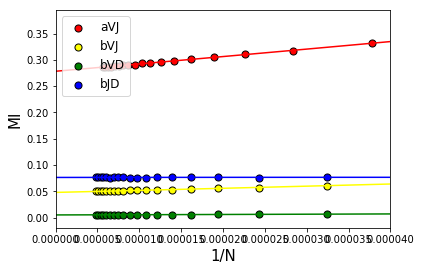

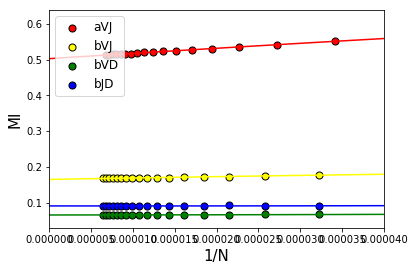

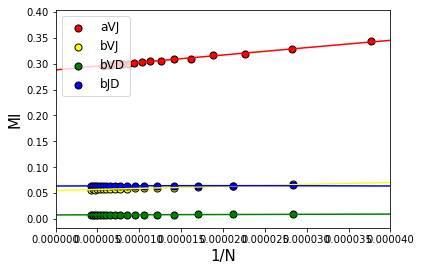

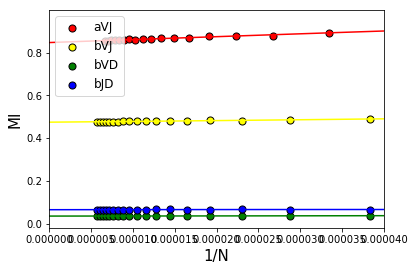

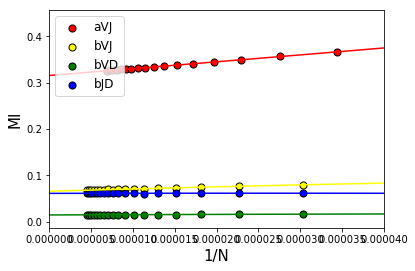

In [63]:
#plot for single chain gene pairs
#Subject 1
f, ax = plt.subplots()
ax.scatter(aVaJ_1[0],aVaJ_1[1],color='red', edgecolor='black', marker='o', s=50, label='aVJ', alpha=1)
ax.scatter(bVbJ_1[0],bVbJ_1[1],color='yellow', edgecolor='black', marker='o', s=50, label='bVJ', alpha=1)
ax.scatter(bVbD_1[0],bVbD_1[1],color='green', edgecolor='black', marker='o', s=50, label='bVD', alpha=1)
ax.scatter(bDbJ_1[0],bDbJ_1[1],color='blue', edgecolor='black', marker='o', s=50, label='bJD', alpha=1)

ax.plot(MI_aVaJ_1[0],MI_aVaJ_1[1],color='red', alpha=1)
ax.plot(MI_bVbJ_1[0],MI_bVbJ_1[1],color='yellow', alpha=1)
ax.plot(MI_bVbD_1[0],MI_bVbD_1[1],color='green', alpha=1)
ax.plot(MI_bDbJ_1[0],MI_bDbJ_1[1],color='blue', alpha=1)

ax.errorbar(aVaJ_1[0],aVaJ_1[1], yerr=aVaJ_1[2], ls='none', color='black', elinewidth=2)
ax.errorbar(bVbJ_1[0],bVbJ_1[1], yerr=bVbJ_1[2], ls='none', color='black', elinewidth=2)
ax.errorbar(bVbD_1[0],bVbD_1[1], yerr=bVbD_1[2], ls='none', color='black', elinewidth=2)
ax.errorbar(bDbJ_1[0],bDbJ_1[1], yerr=bDbJ_1[2], ls='none', color='black', elinewidth=2)

ax.set_xlabel("1/N", fontsize=15)
ax.set_ylabel("MI", fontsize=15)
plt.xlim(0, 0.00004)
#plt.ylim(0, 0.4)
plt.legend(loc='upper left', fontsize=12)
plt.savefig('Mutual_information_singlegenes_S1.png')

#Subject 2
f, ax = plt.subplots()
ax.scatter(aVaJ_2[0],aVaJ_2[1],color='red', edgecolor='black', marker='o', s=50, label='aVJ', alpha=1)
ax.scatter(bVbJ_2[0],bVbJ_2[1],color='yellow', edgecolor='black', marker='o', s=50, label='bVJ', alpha=1)
ax.scatter(bVbD_2[0],bVbD_2[1],color='green', edgecolor='black', marker='o', s=50, label='bVD', alpha=1)
ax.scatter(bDbJ_2[0],bDbJ_2[1],color='blue', edgecolor='black', marker='o', s=50, label='bJD', alpha=1)

ax.plot(MI_aVaJ_2[0],MI_aVaJ_2[1],color='red', alpha=1)
ax.plot(MI_bVbJ_2[0],MI_bVbJ_2[1],color='yellow', alpha=1)
ax.plot(MI_bVbD_2[0],MI_bVbD_2[1],color='green', alpha=1)
ax.plot(MI_bDbJ_2[0],MI_bDbJ_2[1],color='blue', alpha=1)

ax.errorbar(aVaJ_2[0],aVaJ_2[1], yerr=aVaJ_2[2], ls='none', color='black', elinewidth=2)
ax.errorbar(bVbJ_2[0],bVbJ_2[1], yerr=bVbJ_2[2], ls='none', color='black', elinewidth=2)
ax.errorbar(bVbD_2[0],bVbD_2[1], yerr=bVbD_2[2], ls='none', color='black', elinewidth=2)
ax.errorbar(bDbJ_2[0],bDbJ_2[1], yerr=bDbJ_2[2], ls='none', color='black', elinewidth=2)

ax.set_xlabel("1/N", fontsize=15)
ax.set_ylabel("MI", fontsize=15)
plt.xlim(0, 0.00004)
#plt.ylim(0, 0.4)
plt.legend(loc='upper left', fontsize=12)
plt.savefig('Mutual_information_singlegenes_S2.png')

#Subject 3
f, ax = plt.subplots()
ax.scatter(aVaJ_3[0],aVaJ_3[1],color='red', edgecolor='black', marker='o', s=50, label='aVJ', alpha=1)
ax.scatter(bVbJ_3[0],bVbJ_3[1],color='yellow', edgecolor='black', marker='o', s=50, label='bVJ', alpha=1)
ax.scatter(bVbD_3[0],bVbD_3[1],color='green', edgecolor='black', marker='o', s=50, label='bVD', alpha=1)
ax.scatter(bDbJ_3[0],bDbJ_3[1],color='blue', edgecolor='black', marker='o', s=50, label='bJD', alpha=1)

ax.plot(MI_aVaJ_3[0],MI_aVaJ_3[1],color='red', alpha=1)
ax.plot(MI_bVbJ_3[0],MI_bVbJ_3[1],color='yellow', alpha=1)
ax.plot(MI_bVbD_3[0],MI_bVbD_3[1],color='green', alpha=1)
ax.plot(MI_bDbJ_3[0],MI_bDbJ_3[1],color='blue', alpha=1)

ax.errorbar(aVaJ_3[0],aVaJ_3[1], yerr=aVaJ_3[2], ls='none', color='black', elinewidth=2)
ax.errorbar(bVbJ_3[0],bVbJ_3[1], yerr=bVbJ_3[2], ls='none', color='black', elinewidth=2)
ax.errorbar(bVbD_3[0],bVbD_3[1], yerr=bVbD_3[2], ls='none', color='black', elinewidth=2)
ax.errorbar(bDbJ_3[0],bDbJ_3[1], yerr=bDbJ_3[2], ls='none', color='black', elinewidth=2)

ax.set_xlabel("1/N", fontsize=15)
ax.set_ylabel("MI", fontsize=15)
plt.xlim(0, 0.00004)
#plt.ylim(0, 0.4)
plt.legend(loc='upper left', fontsize=12)
plt.savefig('Mutual_information_singlegenes_S3.png')

#Subject 4
f, ax = plt.subplots()
ax.scatter(aVaJ_4[0],aVaJ_4[1],color='red', edgecolor='black', marker='o', s=50, label='aVJ', alpha=1)
ax.scatter(bVbJ_4[0],bVbJ_4[1],color='yellow', edgecolor='black', marker='o', s=50, label='bVJ', alpha=1)
ax.scatter(bVbD_4[0],bVbD_4[1],color='green', edgecolor='black', marker='o', s=50, label='bVD', alpha=1)
ax.scatter(bDbJ_4[0],bDbJ_4[1],color='blue', edgecolor='black', marker='o', s=50, label='bJD', alpha=1)

ax.plot(MI_aVaJ_4[0],MI_aVaJ_4[1],color='red', alpha=1)
ax.plot(MI_bVbJ_4[0],MI_bVbJ_4[1],color='yellow', alpha=1)
ax.plot(MI_bVbD_4[0],MI_bVbD_4[1],color='green', alpha=1)
ax.plot(MI_bDbJ_4[0],MI_bDbJ_4[1],color='blue', alpha=1)

ax.errorbar(aVaJ_4[0],aVaJ_4[1], yerr=aVaJ_4[2], ls='none', color='black', elinewidth=2)
ax.errorbar(bVbJ_4[0],bVbJ_4[1], yerr=bVbJ_4[2], ls='none', color='black', elinewidth=2)
ax.errorbar(bVbD_4[0],bVbD_4[1], yerr=bVbD_4[2], ls='none', color='black', elinewidth=2)
ax.errorbar(bDbJ_4[0],bDbJ_4[1], yerr=bDbJ_4[2], ls='none', color='black', elinewidth=2)

ax.set_xlabel("1/N", fontsize=15)
ax.set_ylabel("MI", fontsize=15)
plt.xlim(0, 0.00004)
#plt.ylim(0, 0.4)
plt.legend(loc='upper left', fontsize=12)
plt.savefig('Mutual_information_singlegenes_S4.png')

#Subject 5
f, ax = plt.subplots()
ax.scatter(aVaJ_5[0],aVaJ_5[1],color='red', edgecolor='black', marker='o', s=50, label='aVJ', alpha=1)
ax.scatter(bVbJ_5[0],bVbJ_5[1],color='yellow', edgecolor='black', marker='o', s=50, label='bVJ', alpha=1)
ax.scatter(bVbD_5[0],bVbD_5[1],color='green', edgecolor='black', marker='o', s=50, label='bVD', alpha=1)
ax.scatter(bDbJ_5[0],bDbJ_5[1],color='blue', edgecolor='black', marker='o', s=50, label='bJD', alpha=1)

ax.plot(MI_aVaJ_5[0],MI_aVaJ_5[1],color='red', alpha=1)
ax.plot(MI_bVbJ_5[0],MI_bVbJ_5[1],color='yellow', alpha=1)
ax.plot(MI_bVbD_5[0],MI_bVbD_5[1],color='green', alpha=1)
ax.plot(MI_bDbJ_5[0],MI_bDbJ_5[1],color='blue', alpha=1)

ax.errorbar(aVaJ_5[0],aVaJ_5[1], yerr=aVaJ_5[2], ls='none', color='black', elinewidth=2)
ax.errorbar(bVbJ_5[0],bVbJ_5[1], yerr=bVbJ_5[2], ls='none', color='black', elinewidth=2)
ax.errorbar(bVbD_5[0],bVbD_5[1], yerr=bVbD_5[2], ls='none', color='black', elinewidth=2)
ax.errorbar(bDbJ_5[0],bDbJ_5[1], yerr=bDbJ_5[2], ls='none', color='black', elinewidth=2)

ax.set_xlabel("1/N", fontsize=15)
ax.set_ylabel("MI", fontsize=15)
plt.xlim(0, 0.00004)
#plt.ylim(0, 0.4)
plt.legend(loc='upper left', fontsize=12)
plt.savefig('Mutual_information_singlegenes_S5.png')

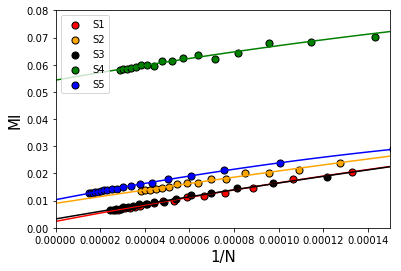

In [66]:
#Plot for CDR3 lengths.
#One plot for all subjects
f, ax = plt.subplots()
ax.scatter(aCDR3_bCDR3_1[0],aCDR3_bCDR3_1[1],color='red', edgecolor='black', marker='o', s=50, alpha=1, label='S1')
ax.scatter(aCDR3_bCDR3_2[0],aCDR3_bCDR3_2[1],color='orange', edgecolor='black', marker='o', s=50, alpha=1, label='S2')
ax.scatter(aCDR3_bCDR3_3[0],aCDR3_bCDR3_3[1],color='black', edgecolor='black', marker='o', s=50, alpha=1, label='S3')
ax.scatter(aCDR3_bCDR3_4[0],aCDR3_bCDR3_4[1],color='green', edgecolor='black', marker='o', s=50, alpha=1, label='S4')
ax.scatter(aCDR3_bCDR3_5[0],aCDR3_bCDR3_5[1],color='blue', edgecolor='black', marker='o', s=50, alpha=1, label='S5')

ax.plot(MI_aCDR3_bCDR3_1[0],MI_aCDR3_bCDR3_1[1],color='red', alpha=1)
ax.plot(MI_aCDR3_bCDR3_2[0],MI_aCDR3_bCDR3_2[1],color='orange', alpha=1)
ax.plot(MI_aCDR3_bCDR3_3[0],MI_aCDR3_bCDR3_3[1],color='black', alpha=1)
ax.plot(MI_aCDR3_bCDR3_4[0],MI_aCDR3_bCDR3_4[1],color='green', alpha=1)
ax.plot(MI_aCDR3_bCDR3_5[0],MI_aCDR3_bCDR3_5[1],color='blue', alpha=1)

ax.errorbar(aCDR3_bCDR3_1[0],aCDR3_bCDR3_1[1], yerr=aCDR3_bCDR3_1[2], ls='none', color='black', elinewidth=2)
ax.errorbar(aCDR3_bCDR3_2[0],aCDR3_bCDR3_2[1], yerr=aCDR3_bCDR3_2[2], ls='none', color='black', elinewidth=2)
ax.errorbar(aCDR3_bCDR3_3[0],aCDR3_bCDR3_3[1], yerr=aCDR3_bCDR3_3[2], ls='none', color='black', elinewidth=2)
ax.errorbar(aCDR3_bCDR3_4[0],aCDR3_bCDR3_4[1], yerr=aCDR3_bCDR3_4[2], ls='none', color='black', elinewidth=2)
ax.errorbar(aCDR3_bCDR3_5[0],aCDR3_bCDR3_5[1], yerr=aCDR3_bCDR3_5[2], ls='none', color='black', elinewidth=2)

ax.set_xlabel("1/N", fontsize=15)
ax.set_ylabel("MI", fontsize=15)
plt.xlim(0, 0.00015)
plt.ylim(0, 0.08)
plt.legend(loc='upper left')
plt.savefig('Mutual_information_CDR3length.png')